# Assignment 2: Logistic Regression and Feature Selection Analysis
- **Author**  : sumashree Javaji
- **Dataset** : cancer.csv | Breast Cancer Diagnosis
- **Dataset Description** :The Breast Cancer Dataset contains features computed from a digitized image of a fine needle aspirate of a breast mass.
- **Problem Statement** : The goal is to classify whether cancer cell is malignant or benign.

### **Data Exploration and Visualization**
- Import data to a pandas dataframe
- Import necessary packages - Pandas , os
- Get high level overview of the data
- Check for null values & proceed with handling na's
- drop unecessary columns (columns with no data - eg. 'unnamed' column or irrelavant data - eg. 'id' column)
- Plot graphs to undertsand the distribution & relation between variables

#### Importing necessary libraries 

In [1]:
### for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

#### Importing os library to change my current working directory to a new folder created for Machine Learning Series 2

In [2]:
# Importing os library to change my current working directory to a new folder created for homework 2
import os
os.chdir('/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_2') # setting cwd to a new path
os.getcwd() # checking my environment's current working directory

# Loading the data
cancer_df = pd.read_csv("Cancer.csv")
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

#### Observations
- Data has : 569 rows & 33 columns
- Unnamed column - has all null records
- dropping id & unnamed columns as they're not relavant for analysis
- Diagnosis distinct values : M & B (Malignant & Benign)

In [3]:
print('There are',cancer_df.shape[0],'rows &',cancer_df.shape[1],'columns in the dataset') # printing the shape of the data to understand what's the volume of data we are dealing with

There are 569 rows & 33 columns in the dataset


In [4]:
cancer_df.info() # To check Data types of each column , memory consumption of the dataset & count of non null records 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancer_df=cancer_df.drop(columns=['Unnamed: 32','id']) # drop any irrelavant columns 

In [6]:
# Check the ratio of classes (M , B) in diagnossi column (response variable), to understand how balanced our dataset is. 
unique_diagnosis = cancer_df['diagnosis'].unique()
unique_diagnosis_count = cancer_df['diagnosis'].nunique() 
print('Diagnosis Results :',unique_diagnosis)

Diagnosis Results : ['M' 'B']


#### Bar Chart 
- To check the distribution/Volume of the breast cancer cases - Malignant (serious) / Benign (harmless)
- Malignant (serious) = 63% of the records 
- Benign (harmless) = 37% of the records

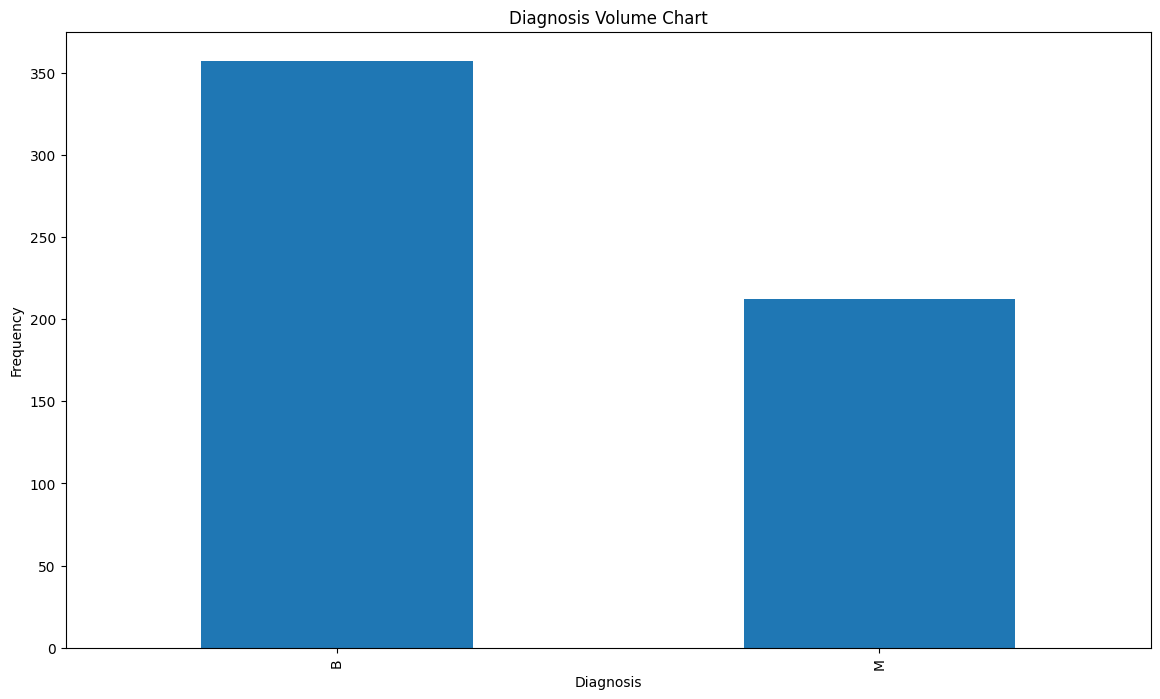

In [7]:
count = cancer_df['diagnosis'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Diagnosis Volume Chart")
count.set_xlabel("Diagnosis")
count.set_ylabel("Frequency")

plt.show()

In [8]:
cancer_df['diagnosis'].value_counts()/569*100

diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

#### BoxPlots 
- Radius Mean : Radius mean for the entire dataset shows a left skew, which makes sense given the high % of Malignant cancer cells 
- Radius Mean by Diagnosis : Centered Median suggests that there's no skewness in the data within B & M
    1. B : 75% of the data is <=14 | less variablity in radius mean
    2. M : 75% of the data is >=15 | more variablility in radius mean
    3. we can imply that there's definetly a distinction between B & M cells mean radius 

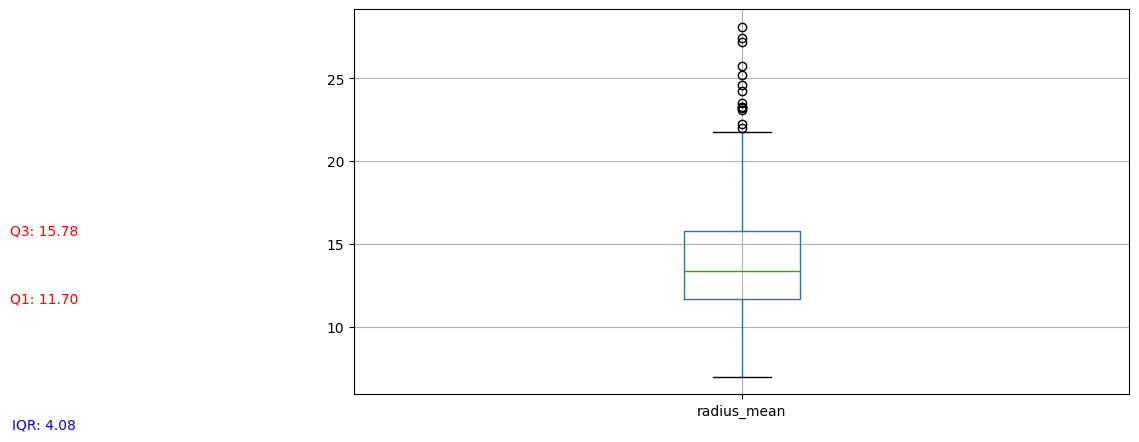

In [9]:
# Boxplot for Earnings Per Share of all the filings
plt.figure(figsize=(10,5))
cancer_df.boxplot(column='radius_mean')

# Calculate IQR
q1 = np.percentile(cancer_df['radius_mean'].dropna(), 25)
q3 = np.percentile(cancer_df['radius_mean'].dropna(), 75)
iqr = q3 - q1

# displaying the IQR on the graph
plt.text(0.1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(0.1,  q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(0.1,  iqr, f'IQR: {iqr:.2f}', horizontalalignment='center', verticalalignment='center', color='blue')

# Show the plot
plt.show()

<Figure size 1000x500 with 0 Axes>

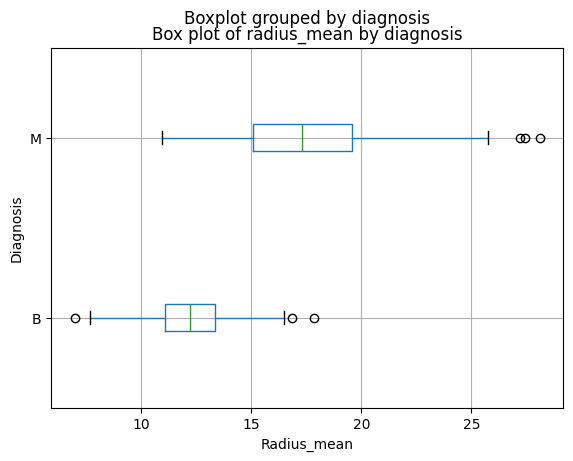

In [10]:
plt.figure(figsize=(10, 5))
cancer_df.boxplot(column='radius_mean', by='diagnosis', vert=False)
plt.title("Box plot of radius_mean by diagnosis")
plt.xlabel("Radius_mean")
plt.ylabel("Diagnosis")
plt.show()

#### Label Encoding : Diagnosis Column M = 1 | B = 0
- Copying the raw data to cancer_df_raw, before making any major modifications to the data

In [11]:
cancer_df['diagnosis_val'] = np.where(cancer_df['diagnosis']=='M', '1','0') # Label encoding
cancer_df = cancer_df.astype({"diagnosis_val": int})
cancer_df_raw = cancer_df.copy()

#### Compare means of various numeric columns for Benign & Malignant nuclei
- Columns : Radius , Area , Perimeter , compactness , comcavity have significant difference in means when compared between Benign & Maignant nucli

In [12]:
cancer_df=cancer_df.drop(columns=['diagnosis'])
cancer_df.groupby('diagnosis_val').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis_val                                                          
0                12.146524     17.914762       78.075406  462.790196   
1                17.462830     21.604906      115.365377  978.376415   

               smoothness_mean  compactness_mean  concavity_mean  \
diagnosis_val                                                      
0                     0.092478          0.080085        0.046058   
1                     0.102898          0.145188        0.160775   

               concave points_mean  symmetry_mean  fractal_dimension_mean  \
diagnosis_val                                                               
0                         0.025717       0.174186                0.062867   
1                         0.087990       0.192909                0.062680   

               ...  radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis_val  ...                                                              
0              ...     13.379801      23.515070        87.005938   558.899440   
1              ...     21.134811      29.318208       141.370330  1422.286321   

               smoothness_worst  compactness_worst  concavity_worst  \
diagnosis_val                                                         
0                      0.124959           0.182673         0.166238   
1                      0.144845           0.374824         0.450606   

               concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis_val                                                                 
0                          0.074444        0.270246                 0.079442  
1                          0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

### Correlation Matrix - all variables(X) with diagnosis (Y)
- concave_points_worst , concave_points_mean , perimeter mean & radius mean are highly correlated with diagnosis

In [13]:
# Automating the correlation matrix , requires the df to have just the continuous columns. 
# Filtering just for the numeric datatypes and storing them in a new df
continuous_columns = cancer_df.select_dtypes(include=['float64', 'int64']).columns
cancer_df_continuous = cancer_df[continuous_columns]
cancer_df_continuous=cancer_df_continuous.drop(columns=['diagnosis_val'])

Text(0.5, 1.0, 'Correlation w.r.t diagnosis')

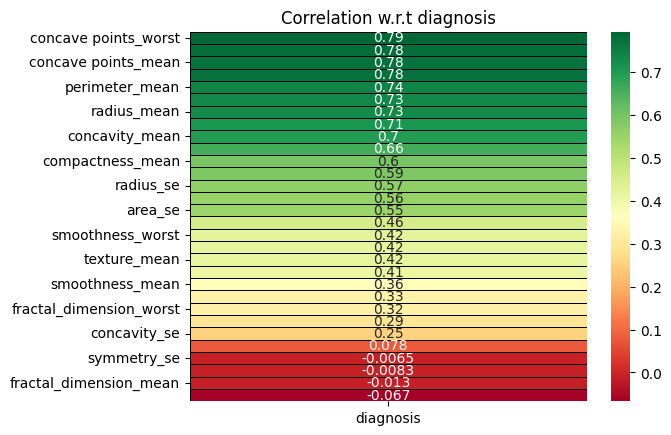

In [14]:
## Calculating & conditional formating the correlation between all the continuous variables of the dataset vs diagnosis
corr = cancer_df_continuous.corrwith(cancer_df['diagnosis_val']).sort_values(ascending = False).to_frame() 
corr.columns = ['diagnosis']
sns.heatmap(corr,annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t diagnosis')


#### Pairwise Scatter plots for all the continuous variables in the data set
- I picked up the highest correlated variables with diagnosis and used them to check for their relatinship with all other continuous variables in the dataset
- The same is reflecting in the scatter plots below, we can see that the benign cells are having lower radius_mean, perimeter_mean, concave_points_mean & concave_points_worst
- Observations :
    - The **radius_mean** of the nuclei is highly correlated to the **concave_points_mean**, which suggests that with the increase in nucli size there is an increase in concave points (deformities) (Benign have less concave_points_mean)
    - The **concave_points_mean** & **compactness_mean** are highly correlated, which suggests that with the increase in compactness, there is increase in concave_points_mean. (Benign have less compactness_mean)
    - The **radius_mean** & **texture_mean** are highly correlated, which suggests that with the increase in radius of the cell, there is increase in texture_mean of the cell. (Benign have less texture_mean)
- double click on the chart to zoom in and evaluate pairwise plots 
- B = Blue | M = Orange
- Note : not mentioning the impact of area or perimeter as it is obvious that if radius has an impact then area & perimeter would do too.

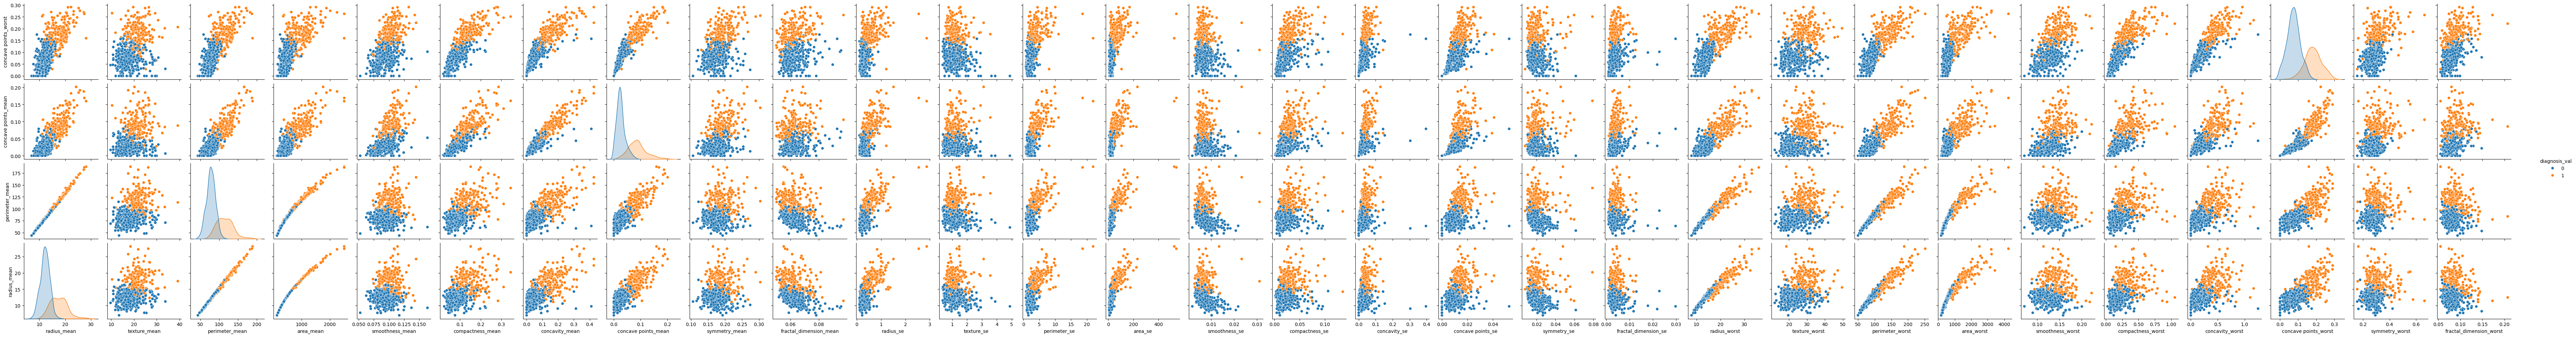

In [15]:
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(cancer_df ,y_vars=["concave points_worst" , "concave points_mean" ,"perimeter_mean","radius_mean"],hue='diagnosis_val')

#### Concave points mean vs Diagnosis
There's a clear disinction between the mean of all concave points for Benign & Malignant nuclei, with the mean concave_points_mean of 0.028 for B & 0.084 for M

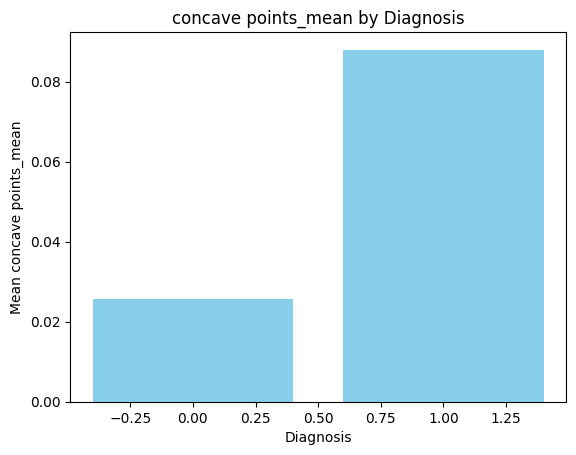

In [16]:
grouped_cancer_df = cancer_df.groupby('diagnosis_val')['concave points_mean'].mean().reset_index()

# Create a bar chart
plt.bar(grouped_cancer_df['diagnosis_val'], grouped_cancer_df['concave points_mean'], color='skyblue')
plt.xlabel('Diagnosis')
plt.ylabel('Mean concave points_mean')
plt.title('concave points_mean by Diagnosis')
plt.show()

### **Logistic Regression Model Development**
- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Split the dataset into **training and testing sets** to perform this evaluation using **train_test_split library**
   - **Imbalanced dataset** : the data is not balanced as it has high Benign cases than Malignant & this might be an issue as the model would be inclined to predict the majority class & wouldn't perform really well on the minority class (Malignant). This would completely deny the reason developing this model as identifying Malignant cases is more important here. (Using SMOTE to balance the 70% of the training dataset)
   - **R-squared** = 1 - N/N0 ; 0.9999, however the p values of none of the variables are significant which suggests a strong case of multicollinearity
- **Remedying Multicollinearity** - by finding the Variance Inflation Factors (VIF's). Check and remove the **VIF's > 5**
- check the fit of the reduced model (post remedying multicollinearity)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # to divide the data into training & validation 

In [18]:
# Checking the distribution of predictor variable & we do not have a balanced data set
print(cancer_df.groupby('diagnosis_val')['diagnosis_val'].count())

diagnosis_val
0    357
1    212
Name: diagnosis_val, dtype: int64


In [19]:
# Stroing all the independent variables in X & dependent variable in y
X = cancer_df.loc[:, cancer_df.columns != 'diagnosis_val']
y = cancer_df.loc[:, cancer_df.columns == 'diagnosis_val']

#### **SMOTE**
- Balancing the training dataset
- SMOTE - Synthetic minority overestimating technique

In [20]:
# pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Use fit_resample instead of fit_sample
X_resampled_full, y_resampled_full = smote.fit_resample(X_train, y_train)

print("length of oversampled data is ",len(X_resampled_full))
print("Number of B in oversampled data",len(y_resampled_full[y_resampled_full['diagnosis_val']==0]))
print("Number of M",len(y_resampled_full[y_resampled_full['diagnosis_val']==1]))
print("Proportion of B data in oversampled data is ",len(y_resampled_full[y_resampled_full['diagnosis_val']==0])/len(X_resampled_full))
print("Proportion of M data in oversampled data is ",len(y_resampled_full[y_resampled_full['diagnosis_val']==1])/len(X_resampled_full))

length of oversampled data is  498
Number of B in oversampled data 249
Number of M 249
Proportion of B data in oversampled data is  0.5
Proportion of M data in oversampled data is  0.5


#### **Full Model**

In [22]:
X_resampled = sm.add_constant(X_resampled_full) # Add a constant (intercept) to the predictors

# Fit the GLM model
full_model = sm.GLM(y_resampled_full, X_resampled_full, family=sm.families.Binomial()).fit()

# Calculate the R^2 value
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
r_squared

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  w

0.9999999999953453

In [23]:
full_model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          diagnosis_val   No. Observations:                  498
Model:                            GLM   Df Residuals:                      468
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 31 Mar 2024   Deviance:                   3.2135e-09
Time:                        12:46:53   Pearson chi2:                 1.61e-09
No. Iterations:                    30   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
radius_mean              -340.9134    3.2e+06     -0.000      1.000   -6.27e+06    6.27e+06
texture_mean                7.1815   3.75e+04      0.000      1.000   -7.34e+04    7.35e+04
perimeter_mean             31.6344   3.65e+05   8.66e-05      1.000   -7.16e+05    7.16e+05
area_mean                   0.5834   2.27e+04   2.56e-05      1.000   -4.46e+04    4.46e+04
smoothness_mean           547.9965   3.63e+07   1.51e-05      1.000   -7.11e+07    7.11e+07
compactness_mean        -3834.5561   1.59e+07     -0.000      1.000   -3.12e+07    3.12e+07
concavity_mean              9.1487   1.76e+07   5.21e-07      1.000   -3.44e+07    3.44e+07
concave points_mean      6104.7469    3.2e+07      0.000      1.000   -6.26e+07    6.27e+07
symmetry_mean             560.4928   6.52e+06    8.6e-05      1.000   -1.28e+07    1.28e+07
fractal_dimension_mean    369.9068   4.95e+07   7.47e-06      1.000   -9.71e+07    9.71e+07
radius_se                 275.2749   6.48e+06   4.25e-05      1.000   -1.27e+07    1.27e+07
texture_se                 29.2911    5.9e+05   4.96e-05      1.000   -1.16e+06    1.16e+06
perimeter_se              -91.7396   8.19e+05     -0.000      1.000   -1.61e+06    1.61e+06
area_se                     4.6871   1.07e+05   4.39e-05      1.000   -2.09e+05    2.09e+05
smoothness_se           -1.886e+04   7.78e+07     -0.000      1.000   -1.53e+08    1.52e+08
compactness_se          -2872.8495   2.48e+07     -0.000      1.000   -4.86e+07    4.86e+07
concavity_se             2447.8574   2.03e+07      0.000      1.000   -3.98e+07    3.98e+07
concave points_se         2.26e+04   1.82e+08      0.000      1.000   -3.57e+08    3.57e+08
symmetry_se               167.1679    2.3e+07   7.28e-06      1.000    -4.5e+07     4.5e+07
fractal_dimension_se    -8.438e+04   2.51e+08     -0.000      1.000   -4.92e+08    4.92e+08
radius_worst              -83.4679   1.73e+06  -4.82e-05      1.000   -3.39e+06    3.39e+06
texture_worst               1.9293   3.77e+04   5.11e-05      1.000    -7.4e+04     7.4e+04
perimeter_worst             7.9791   1.17e+05   6.82e-05      1.000   -2.29e+05    2.29e+05
area_worst                  1.2404   1.91e+04   6.49e-05      1.000   -3.74e+04    3.74e+04
smoothness_worst         -403.7858   1.41e+07  -2.87e-05      1.000   -2.76e+07    2.76e+07
compactness_worst        -280.0695   4.44e+06  -6.31e-05      1.000    -8.7e+06     8.7e+06
concavity_worst           168.1284   6.31e+06   2.66e-05      1.000   -1.24e+07    1.24e+07
concave points_worst    -1545.0263   2.76e+07  -5.59e-05      1.000   -5.41e+07    5.41e+07
symmetry_worst            782.6315   5.83e+06      0.000      1.000   -1.14e+07    1.14e+07
fractal_dimension_worst  1.098e+04   3.27e+07      0.000      1.000    -6.4e+07     6.4e+07
===============================================

### Remedying Multicollinearity

In [24]:
cancer_df_int = cancer_df.copy()
cancer_df_int = cancer_df_int.drop(columns=['diagnosis_val']) # dropping the dependent variable to check for multicollinearity within the X(independent variables)

In [25]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df,considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [26]:
cdf_vif=compute_vif(cancer_df_int,cancer_df_int.columns.tolist()).sort_values('VIF', ascending=False)
# cdf_vif = cdf_vif[cdf_vif['VIF']>3000 ]
cdf_vif

Variable          VIF
0               radius_mean  3806.115296
2            perimeter_mean  3786.400419
20             radius_worst   799.105946
22          perimeter_worst   405.023336
3                 area_mean   347.878657
23               area_worst   337.221924
10                radius_se    75.462027
6            concavity_mean    70.767720
12             perimeter_se    70.359695
7       concave points_mean    60.041733
5          compactness_mean    50.505168
13                  area_se    41.163091
25        compactness_worst    36.982755
27     concave points_worst    36.763714
26          concavity_worst    31.970723
29  fractal_dimension_worst    18.861533
21            texture_worst    18.569966
9    fractal_dimension_mean    15.756977
16             concavity_se    15.694833
15           compactness_se    15.366324
1              texture_mean    11.884048
17        concave points_se    11.520796
24         smoothness_worst    10.923061
19     fractal_dimension_se     9.717987
28           symmetry_worst     9.520570
4           smoothness_mean     8.194282
18              symmetry_se     5.175426
8             symmetry_mean     4.220656
11               texture_se     4.205423
14            smoothness_se     4.027923

In [27]:
cancer_df_reduced = cancer_df.copy()
cancer_df_reduced=cancer_df_reduced.drop(columns=['perimeter_mean','radius_se','texture_se','smoothness_se','symmetry_se','fractal_dimension_se','perimeter_worst','area_worst','perimeter_se','area_mean','area_se','radius_worst','compactness_worst','compactness_mean','smoothness_worst','symmetry_worst','texture_worst','fractal_dimension_mean','compactness_se','concavity_se','concavity_worst'])


In [28]:
# Stroing all the independent variables in X & dependent variable in y
X_r = cancer_df_reduced.loc[:, cancer_df_reduced.columns != 'diagnosis_val']
y_r = cancer_df_reduced.loc[:, cancer_df_reduced.columns == 'diagnosis_val']

In [29]:
cancer_df_reduced.head()

radius_mean  texture_mean  smoothness_mean  concavity_mean  \
0        17.99         10.38          0.11840          0.3001   
1        20.57         17.77          0.08474          0.0869   
2        19.69         21.25          0.10960          0.1974   
3        11.42         20.38          0.14250          0.2414   
4        20.29         14.34          0.10030          0.1980   

   concave points_mean  symmetry_mean  concave points_se  \
0              0.14710         0.2419            0.01587   
1              0.07017         0.1812            0.01340   
2              0.12790         0.2069            0.02058   
3              0.10520         0.2597            0.01867   
4              0.10430         0.1809            0.01885   

   concave points_worst  fractal_dimension_worst  diagnosis_val  
0                0.2654                  0.11890              1  
1                0.1860                  0.08902              1  
2                0.2430                  0.08758              1  
3                0.2575                  0.17300              1  
4                0.1625                  0.07678              1

In [30]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.3, random_state=0)

# Use fit_resample instead of fit_sample
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("length of oversampled data is ",len(X_resampled))
print("Number of B in oversampled data",len(y_resampled[y_resampled['diagnosis_val']==0]))
print("Number of M",len(y_resampled[y_resampled['diagnosis_val']==1]))
print("Proportion of B data in oversampled data is ",len(y_resampled[y_resampled['diagnosis_val']==0])/len(X_resampled))
print("Proportion of M data in oversampled data is ",len(y_resampled[y_resampled['diagnosis_val']==1])/len(X_resampled))
# y_resampled

length of oversampled data is  498
Number of B in oversampled data 249
Number of M 249
Proportion of B data in oversampled data is  0.5
Proportion of M data in oversampled data is  0.5


#### **Reduced Model**
- Model Evaluation post post fixing multicollinearity
- R_squared : 0.809
- Model Accuracy score : 95.38 (prediction on test data) 
- RMSE : 0.283
- After reducing full model , the model accuracy is 95.38 when testing the model on the validation set, which is a good indicator that the logistic regression model is good at predicting the probabilities

In [31]:
# using family = binomial to do a logistic regression
X_resampled = sm.add_constant(X_resampled)  # Add a constant (intercept) to the predictors

# Fit the GLM model
r_model = sm.GLM(y_resampled, X_resampled, family=sm.families.Binomial()).fit()

# Calculate the R^2 value
r_squared = 1 - (r_model.deviance / r_model.null_deviance)
r_squared

0.8461254894721169

In [32]:
r_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          diagnosis_val   No. Observations:                  498
Model:                            GLM   Df Residuals:                      488
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.116
Date:                Sun, 31 Mar 2024   Deviance:                       106.23
Time:                        12:46:54   Pearson chi2:                     640.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6906
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -37.1886      7.999     -4.649      0.000     -52.866     -21.511
radius_mean                 1.0284      0.278      3.701      0.000       0.484       1.573
texture_mean                0.4123      0.078      5.266      0.000       0.259       0.566
smoothness_mean            80.1685     41.115      1.950      0.051      -0.416     160.753
concavity_mean             14.3164     13.291      1.077      0.281     -11.733      40.366
concave points_mean         1.0250     42.425      0.024      0.981     -82.126      84.176
symmetry_mean              14.7810     13.125      1.126      0.260     -10.944      40.506
concave points_se        -110.8163     78.071     -1.419      0.156    -263.833      42.201
concave points_worst       39.3880     14.428      2.730      0.006      11.110      67.666
fractal_dimension_worst   -10.0601     29.876     -0.337      0.736     -68.617      48.497
===========================================================================================
"""

In [33]:
val = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
logit_preds=r_model.predict(val.drop(['diagnosis_val'], axis=1).values)
logit_preds_binary = (logit_preds >= 0.5).astype(int)
accuracy_score(val['diagnosis_val'], logit_preds_binary)

0.9558232931726908

In [35]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
probs=model.predict_proba(val.drop(['diagnosis_val'], axis=1).values)
mse=mean_squared_error(val['diagnosis_val'], probs[:, 1])
np.sqrt(mse)/(max(val['diagnosis_val'])-min(val['diagnosis_val']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.262685250420351

#### **Testing Interactions Between Features**
- Explore interactions between different features in the dataset.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Check the influence of these interactions on the model

In [37]:
cancer_df_inter = cancer_df_raw.copy()

# Use pd.get_dummies to create dummy variables
dummy_df = pd.get_dummies(cancer_df_inter['diagnosis'])

# Concatenate the dummy variables with the original DataFrame
cancer_df_inter = pd.concat([cancer_df_inter, dummy_df], axis=1)

# Drop the original column if needed
cancer_df_inter = cancer_df_inter.drop('diagnosis', axis=1)
cancer_df_inter = cancer_df_inter.drop('B', axis=1)

In [38]:
##Adding interaction terms to the regression model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

#Consider only required columns: 1-26 and last column
cancer_df_inter = cancer_df_inter.iloc[:, list(range(26)) + [-1]]
# Drop rows with null values
cancer_df_inter = cancer_df_inter.dropna()

#Take first 26 columns as X a last column of 'Estimated Shares Outstanding' as Y
X = cancer_df_inter.iloc[:, list(range(26))]
Y = cancer_df_inter.iloc[:, [-1]]

# Create interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get feature names for all interaction terms
poly_feature_names = poly.get_feature_names_out(X.columns)
# Create a DataFrame with interaction terms and feature names
cancer_df_inter_poly = pd.DataFrame(X_poly, columns=poly_feature_names)
# Add a constant term for the intercept
cancer_df_inter_poly = sm.add_constant(cancer_df_inter_poly)

# Ensure indices are aligned
Y = Y.reset_index(drop=True)
cancer_df_inter_poly = cancer_df_inter_poly.reset_index(drop=True)

# Fit an OLS regression model
model = sm.OLS(Y, cancer_df_inter_poly).fit()

# Display the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           4.29e-56
Time:                        12:46:54   Log-Likelihood:                 490.79
No. Observations:                 569   AIC:                            -225.6
Df Residuals:                     191   BIC:                             1416.
Df Model:                         377                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [39]:
significant_interactions = model.pvalues[model.pvalues <= 0.05].index.tolist()
# significant_interactions

In [40]:
cancer_df=cancer_df.rename(columns=lambda x: x.replace(' ', '_')) # fixing the column names to support performing python 

In [41]:
import statsmodels.api as sm

# Define the formula
formula = 'diagnosis_val ~ compactness_mean + smoothness_worst + compactness_worst + texture_mean * perimeter_mean + texture_mean * texture_se + perimeter_mean * radius_se + area_mean * area_se + smoothness_mean * perimeter_se + smoothness_mean * fractal_dimension_se + compactness_mean * fractal_dimension_mean + concave_points_mean * texture_se + symmetry_mean * fractal_dimension_mean + symmetry_mean * fractal_dimension_se + fractal_dimension_mean * compactness_worst + radius_se * area_se + texture_se * texture_worst + area_se * radius_worst + area_se * area_worst + concavity_se * texture_worst + radius_worst * area_worst'

# Run the regression
model_int = sm.formula.ols(formula, data=cancer_df)
results_int = model_int.fit()
print(results_int.summary())


                            OLS Regression Results                            
Dep. Variable:          diagnosis_val   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     63.47
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          6.67e-168
Time:                        12:46:54   Log-Likelihood:                 80.334
No. Observations:                 569   AIC:                            -86.67
Df Residuals:                     532   BIC:                             74.05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [42]:
# Extract the significant interaction terms
coefficients = results_int.params
p_values = results_int.pvalues
significant_coefficients = {param: pval for param, coef, pval in zip(coefficients.index, coefficients, p_values) if (pval < 0.05 and ":" in param)}

# Print significant coefficients
for param, pval in significant_coefficients.items():
    print(f"{param} \n{round(pval,4)}\n")

perimeter_mean:radius_se 
0.0069

area_mean:area_se 
0.0165

smoothness_mean:perimeter_se 
0.0057

smoothness_mean:fractal_dimension_se 
0.0249

texture_se:texture_worst 
0.034

area_se:radius_worst 
0.0004

area_se:area_worst 
0.0001

radius_worst:area_worst 
0.0006



#### **Interaction terms Model Interpretation :**
- smoothness_mean & perimeter_se | smoothness_mean & fractal_dimension_se have significant interactions
- since there is only 2 interaction terms which are significant with Rsquared being 79.8%, the interaction terms model is not improving the prediction of the model significantly, hence I belive that the reduced model is better in predictions than the model with interactions 

#### **linear regression model to predict binary outcomes**
- Linear regression predictions are not exactly 1 and 0 and can produce any real number as predictions. and we would not be able to directly use them to classify them into malignant & benign cells.
- Therefore it can be used for predicting continuous variables (like in case of linear regression ) but not for binary classification problems ( classifying into success or fail )

In [43]:
cancer_df_test = cancer_df.copy()

### **Feature Selection and Cross-Validation: Full vs. Reduced Model** :
- FDR Cutoff for retrieving significant variables & forward selection for feature selection
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 100-fold cross-validation.

In [44]:
# Stroing all the independent variables in X & dependent variable in y
X = cancer_df.loc[:, cancer_df.columns != 'diagnosis_val']
y = cancer_df.loc[:, cancer_df.columns == 'diagnosis_val']

In [45]:
## Balancing the dataset by oversampling the minority group
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Use fit_resample instead of fit_sample
X_resampled_full, y_resampled_full = smote.fit_resample(X_train, y_train)

print("length of oversampled data is ",len(X_resampled_full))
print("Number of B in oversampled data",len(y_resampled_full[y_resampled_full['diagnosis_val']==0]))
print("Number of M",len(y_resampled_full[y_resampled_full['diagnosis_val']==1]))
print("Proportion of B data in oversampled data is ",len(y_resampled_full[y_resampled_full['diagnosis_val']==0])/len(X_resampled_full))
print("Proportion of M data in oversampled data is ",len(y_resampled_full[y_resampled_full['diagnosis_val']==1])/len(X_resampled_full))

length of oversampled data is  498
Number of B in oversampled data 249
Number of M 249
Proportion of B data in oversampled data is  0.5
Proportion of M data in oversampled data is  0.5


In [46]:
X = X_train
y = y_train

In [47]:
X = sm.add_constant(X) # Add a constant (intercept) to the predictors

# Fit the GLM model
full_model = sm.GLM(y, X).fit()

# Calculate the R^2 value
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
r_squared

0.7811858948400784

In [48]:
## using params along with the np.exp to get the odds ratio of the Variables
# odds ratio tells us the change in odds associated with a one-unit change in the dependent variable (Y)
np.exp(full_model.params)

const                      1.051364e-01
radius_mean                8.206670e-01
texture_mean               1.007587e+00
perimeter_mean             1.024046e+00
area_mean                  1.000058e+00
smoothness_mean            1.020231e+00
compactness_mean           1.005445e-02
concavity_mean             3.848169e+00
concave_points_mean        4.254971e+00
symmetry_mean              3.165967e+00
fractal_dimension_mean     1.159552e+00
radius_se                  2.112400e+00
texture_se                 1.020524e+00
perimeter_se               9.454270e-01
area_se                    9.990337e-01
smoothness_se              1.094603e+04
compactness_se             2.304120e+00
concavity_se               1.305752e-01
concave_points_se          1.794187e+02
symmetry_se                1.243656e+02
fractal_dimension_se       4.929846e-14
radius_worst               1.173303e+00
texture_worst              1.003116e+00
perimeter_worst            1.002611e+00
area_worst                 9.990114e-01


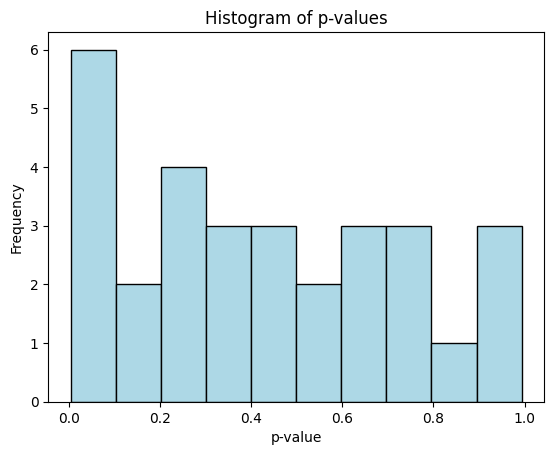

In [49]:
# Extract p-values from the model summary, excluding the intercept
p_values = full_model.pvalues[1:]

# Plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

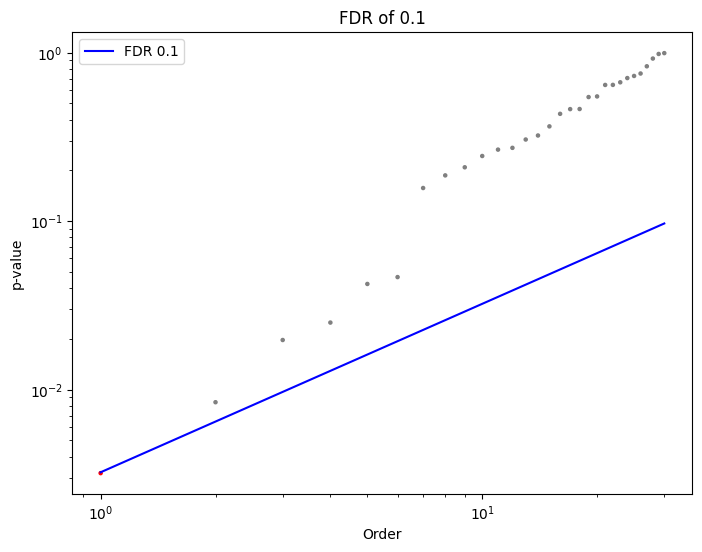

Threshold p-value at 10% FDR: 0.0032


In [50]:
def fdr_cut(pvals, q=0.1):
    """
    Determine the threshold p-value at a given FDR level and plot the p-values.

    Parameters:
        pvals (list or array): A list or array of p-values.
        q (float): The desired FDR level.

    Returns:
        float: The threshold p-value at the given FDR level.
    """
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1) )
    # alpha = max((p for p, rank in zip(pvals, k) if p <= 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")

#### Using the adjusted p value (0.0032) from the FDR and using it to find the significant predictor variables 

In [51]:
# Identify significant predictors based on the threshold p-value
significant_predictors = p_values[p_values <= 0.0032].index.tolist()

# Include the dependent variable 'diagnosis_val' in the selected columns
selected_columns = ['diagnosis_val'] + significant_predictors

# Prepare the data for the new model
X_cut = cancer_df[selected_columns].drop('diagnosis_val', axis=1)
X_cut = sm.add_constant(X_cut)  # Add a constant (intercept) to the predictors
y_cut = cancer_df['diagnosis_val']

# Fit the new GLM model using only the significant predictors
cut_model = sm.GLM(y_cut, X_cut, family=sm.families.Binomial()).fit()

# Calculate the R^2 value for the new model
r_squared_cut = 1 - (cut_model.deviance / cut_model.null_deviance)

print(f"R^2 value for the new model: {r_squared_cut:.4f}")


R^2 value for the new model: 0.3229


### Out of sample prediction experiment
- defining the deviance and R2 functions
- Increasing the k value to 100 as k = 10 is producing all nan's 

In [52]:
# Define the R2 function and deviance as described before
def deviance(y, pred, family="gaussian"):
    if family == "gaussian":
        return np.sum((y - pred) ** 2)
    elif family == "binomial":
        y = np.array(y)
        pred = np.array(pred)
        return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

def R2(y, pred, family="gaussian"):
    dev_val = deviance(y, pred, family=family)
    dev0 = deviance(y, [np.mean(y)] * len(y), family=family)
    return 1 - dev_val / dev0


In [53]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
# Setup the experiment
import warnings
    
n = len(cancer_df)
K = 100
foldid = np.tile(np.arange(1, K+1), int(np.ceil(n/K)))[:n]
np.random.shuffle(foldid)

# Empty lists to store results
OOS_full = []
OOS_cut = []

# Get the significant names
signif_names = significant_predictors.index  # Assuming signif is a DataFrame or Series with column names as index

for k in range(1, K+1):
    train_idx = np.where(foldid != k)[0]
    test_idx = np.where(foldid == k)[0]
    
    # Full model
    X_full_train = sm.add_constant(cancer_df.drop('diagnosis_val', axis=1).iloc[train_idx])
    y_train = cancer_df['diagnosis_val'].iloc[train_idx]
    rfull = sm.GLM(y_train, X_full_train).fit()

    # Cut model
    X_cut_train = sm.add_constant(cancer_df[['diagnosis_val'] + significant_predictors].iloc[train_idx].drop('diagnosis_val', axis=1))
    rcut = sm.GLM(y_train, X_cut_train).fit()

    # Predictions
    X_full_test = sm.add_constant(cancer_df.drop('diagnosis_val', axis=1).iloc[test_idx])
    pred_full = rfull.predict(X_full_test)
    
    X_cut_test = sm.add_constant(cancer_df[['diagnosis_val'] + significant_predictors].iloc[test_idx].drop('diagnosis_val', axis=1))
    pred_cut = rcut.predict(X_cut_test)

    # Calculate R2 and store
    y_test = cancer_df['diagnosis_val'].iloc[test_idx]
    
    # Suppress warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        # Append R-squared values
        OOS_full.append(R2(y_test, pred_full, family="binomial"))
        OOS_cut.append(R2(y_test, pred_cut, family="binomial"))
        
# print(R2(y_test, pred_full, family="binomial"))

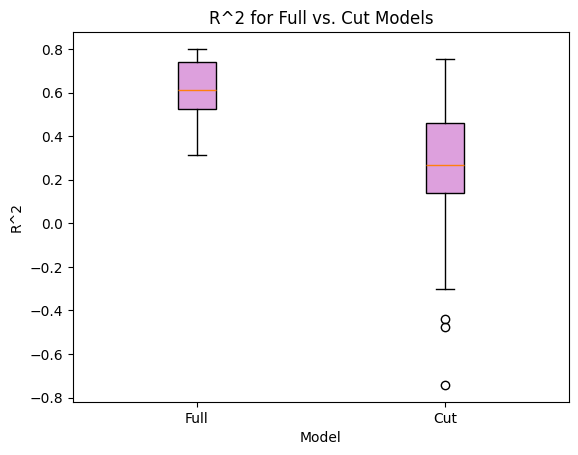

In [54]:
# Cleaning OOS_full
OOS_full_cleaned = [value for value in OOS_full if not np.isinf(value) and not np.isnan(value)]
OOS_cut = [value for value in OOS_cut if not np.isinf(value) and not np.isnan(value)]

plt.boxplot([OOS_full_cleaned, OOS_cut], labels=['Full', 'Cut'], patch_artist=True, boxprops=dict(facecolor="plum"))
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for Full vs. Cut Models')
plt.show()

In [55]:
import time

# Calculate average OOS R^2 values
avg_OOS_full = np.mean(OOS_full_cleaned)
avg_OOS_cut = np.mean(OOS_cut)
print("Average OOS R^2 for Full Model:", round(avg_OOS_full,4))
print("Average OOS R^2 for Cut Model:", round(avg_OOS_cut,4))

Average OOS R^2 for Full Model: 0.6053
Average OOS R^2 for Cut Model: 0.2558


In [56]:
# Fit a null model (only intercept)
X_null = sm.add_constant(cancer_df.drop('diagnosis_val', axis=1).iloc[:, 0:0])  # Empty DataFrame with only intercept
y = cancer_df['diagnosis_val']
null_model = sm.GLM(y, X_null, family=sm.families.Binomial()).fit()

In [57]:
# Forward stepwise procedure (This can be computationally intensive!)
# Note: Python's statsmodels doesn't have a built-in forward selection based on AIC, so we need to implement it manually.

def forward_selection(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = sm.formula.glm(formula, data, family=sm.families.Binomial()).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = sm.formula.glm(formula, data, family=sm.families.Binomial()).fit()
    return model

In [58]:
start_time = time.time()
cancer_df.columns
fwd_model = forward_selection(cancer_df, 'diagnosis_val')
print("Time taken for forward stepwise selection:", time.time() - start_time)
print("Number of coefficients chosen:", len(fwd_model.params))

# BIC, AIC for full vs cut models
print("\nBIC for Full Model:", rfull.bic)
print("BIC for Cut Model:", rcut.bic)

print("\nAIC for Full Model:", rfull.aic)
print("AIC for Cut Model:", rcut.aic)

Time taken for forward stepwise selection: 1.8450510501861572
Number of coefficients chosen: 11

BIC for Full Model: -3346.719176371413
BIC for Cut Model: -3475.272851770913

AIC for Full Model: 5.318746962178551
AIC for Cut Model: 537.430729875859


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


### **Interpretation**

### FDR Method :
- Using the FRD method for feature selection and building & testing the new model on the reduced predictors gives us the following results 
- Average OOS R^2 for Full Model: 0.575
- Average OOS R^2 for Cut Model: 0.145
- Full model is much better at classifying the cells than the cut model as Rsq is almost triple for the Full model than the reduced model
### Box plot :
- From box plot we can read that the variability in full model Rsquared is less with a range of 0.50 - 0.65 ; whereas the variability of Rsquared for reduced model is high with a range of 0.0 to 0.3, which suggests that the results with full model are more consistent than with the reduced model as it is giving varying results with each fold
- Since the Rsquared is higher for full model, we can imply that full model is a better model for predicting whether a cell is Malignant or benign
  
### Forward Selection :
- Using forward selection technique and comparing it with the full model, we can imply that the full model is better at classifying the nucli cells into Benign/Malignant that the reduced model
- as we can see that the AIC for full model is much lower when compared to the reduced model